##FINAL PROJECT

#Introduction

###What am I working with?

I am working with the dry bean dataset taken from the UCI machine learning repository: https://archive.ics.uci.edu/ml/index.php.

The data consists of 13,611 beans of 7 different types: Seker, Dermason, Sira, Horoz, Barbunya, Bombay, and Cali. All these beans were photographed and measured in 16 different ways which make up the features. 12 of these features were dimensions (ConvexArea, Area, Perimeter, etc.) while 4 features were shape forms (roundness, solidity, Eccentricity, compactness). 

This data was gifted to the UCI archive by Murat Koklu of Selcuk University

###What am I trying to accomplish?



*   Create three machine learning algorithims that iterate through the dry bean dataset and create predictions on what type of bean each data point is based off the features
*   Compare the effectiveness of each algorithim



#Loading packages

In [ ]:
from google.colab import drive #mounted my google drive folder onto my Juypter notebook
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import math
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import seaborn as sns 
import matplotlib.pyplot as plt
from numpy.random import default_rng
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import plotly.express as px
from matplotlib.colors import ListedColormap
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

%matplotlib inline

Loading the dry bean dataset

In [ ]:
beandata1 = pd.read_excel(r'/content/drive/MyDrive/Comp_sci/FINAL_project/DryBeanDataset2/Dry_Bean_Dataset.xlsx') #imported beandata from my google drive, it consists of one excel sheet and is read into a pandas dataframe
#if you are doing this on another computer, please change the directory

#Pandas Dataframe Rework

In this section I convert each different class into a numerical value so it is easier to work with in the machine learning algorithims.

In [ ]:
#For ease of classification, each class of bean was taken.

Finalbeandata = beandata1.copy() # copy of the pandas dataframe
extrarray = [] #An array that appends these new values

for i in beandata1['Class']: #for loop that cycles through each unit of Class 
  if i == "BOMBAY":          #and assigns it a number
    extrarray.append(0)
  if i == "CALI":
    extrarray.append(1.0)
  if i == "DERMASON":
    extrarray.append(2.0)
  if i == "SEKER":
    extrarray.append(3.0)
  if i == "HOROZ":
    extrarray.append(4.0)
  if i == "BARBUNYA":
    extrarray.append(5.0)
  if i == "SIRA":
    extrarray.append(6.0)

Numberedlabels = extrarray
Finalbeandata["NumberClass"] = Numberedlabels #An extra column named NumberClass
                                  #Is added to the copy of the beandata, allowing 
                                  #for the easy conversion into numpy array

These are numerical values for each Dry bean type:

Bombay = 0, Cali = 1, Dermason = 2, Seker = 3, Horoz = 4, 
Barbunya = 5, Sira = 6

#Summary statistics and choosing features

##Summary statistics

Means of the Dry bean dataset features

In [ ]:
average = beandata1.groupby("Class").mean() #to get an idea of how the data was represented I took the mean
  #median, maximum, and minimum. This aided me in my feature selection along with graphing it out.
average

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
BARBUNYA,69804.133132,1046.105764,370.044279,240.309352,1.544395,0.754665,71025.729198,297.311018,0.749273,0.982804,0.800200,0.805001,0.005357,0.001394,0.649144,0.995739
BOMBAY,173485.059387,1585.619079,593.152075,374.352547,1.585550,0.770518,175813.116858,468.941426,0.776559,0.986902,0.864421,0.792622,0.003442,0.000844,0.629195,0.991841
CALI,75538.211043,1057.634282,409.499538,236.370616,1.733663,0.814804,76688.503067,309.535280,0.758953,0.985021,0.845934,0.756703,0.005459,0.001107,0.573022,0.990584
DERMASON,32118.710942,665.209536,246.557279,165.657143,1.490471,0.736632,32498.435138,201.683813,0.752953,0.988226,0.908114,0.819110,0.007755,0.002161,0.671636,0.996914
HOROZ,53648.508817,919.859676,372.570290,184.170663,2.026119,0.867443,54440.091805,260.730715,0.706393,0.985480,0.794420,0.700880,0.007007,0.001048,0.491791,0.991926
SEKER,39881.299951,727.672440,251.291957,201.909653,1.245182,0.584781,40269.567341,224.948441,0.771674,0.990351,0.944508,0.896841,0.006334,0.002541,0.805149,0.998383
SIRA,44729.128604,796.418737,299.380258,190.800250,1.570083,0.767277,45273.099772,238.335316,0.749445,0.987971,0.884652,0.797345,0.006720,0.001683,0.636358,0.995385


Median of Dry bean dataset features

In [ ]:
med = beandata1.groupby("Class").median()
med

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
BARBUNYA,69582.0,1045.0600,369.630015,239.721849,1.547761,0.763257,70802.0,297.648373,0.750701,0.983086,0.803159,0.802363,0.005334,0.001369,0.643787,0.996370
BOMBAY,171494.5,1586.2375,590.675623,371.648730,1.586342,0.776286,173586.5,467.283179,0.783777,0.988137,0.864742,0.791052,0.003454,0.000826,0.625764,0.992504
CALI,74791.5,1055.4725,408.783164,235.410889,1.733901,0.816932,75961.5,308.589526,0.765861,0.986235,0.846596,0.755453,0.005467,0.001093,0.570709,0.991269
DERMASON,31890.0,664.5230,246.545813,165.761538,1.484704,0.739156,32271.5,201.503372,0.753932,0.988717,0.912320,0.819528,0.007704,0.002134,0.671626,0.997359
HOROZ,53800.5,921.3955,374.365595,183.836913,2.036556,0.871145,54581.5,261.726812,0.703983,0.987018,0.795961,0.698038,0.006976,0.001024,0.487257,0.993842
SEKER,39180.0,721.2920,249.152044,200.432810,1.236241,0.587941,39539.0,223.350678,0.774202,0.990936,0.951697,0.898746,0.006363,0.002539,0.807744,0.998633
SIRA,44593.0,794.9895,298.586446,190.935238,1.562383,0.768335,45160.5,238.280446,0.752530,0.988516,0.886546,0.798299,0.006696,0.001676,0.637282,0.995987


Minimum values of each feature in Dry Bean Dataset

In [ ]:
minn = beandata1.groupby("Class").min()
minn

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
BARBUNYA,41487,759.552,266.700396,177.081490,1.135792,0.474152,42005,229.832306,0.639787,0.961840,0.593708,0.714494,0.003876,0.000843,0.510502,0.976512
BOMBAY,114004,1265.926,425.923787,323.747996,1.212715,0.565722,115298,380.991340,0.607021,0.957261,0.758417,0.713613,0.002778,0.000564,0.509244,0.968842
CALI,45504,789.770,274.863357,179.834691,1.297228,0.636987,45972,240.702082,0.629406,0.954616,0.727194,0.701215,0.004328,0.000762,0.491702,0.963780
DERMASON,20420,524.736,183.601165,122.512653,1.188088,0.539964,20684,161.243764,0.652881,0.946634,0.489618,0.703370,0.006228,0.001383,0.494730,0.976325
HOROZ,33006,689.294,264.630743,148.167484,1.462019,0.729496,33354,204.998889,0.555315,0.943559,0.556766,0.640577,0.005402,0.000751,0.410339,0.949990
SEKER,28395,610.291,200.524796,171.210559,1.024868,0.218951,28715,190.141097,0.671871,0.919246,0.595048,0.770126,0.005056,0.001405,0.593094,0.947687
SIRA,31519,668.106,233.804968,157.802740,1.259251,0.607757,32065,200.327824,0.627527,0.969256,0.677837,0.704454,0.005686,0.000987,0.496256,0.971228


Maximum values of each feature in Dry bean dataset

In [ ]:
maxx = beandata1.groupby("Class").max()
maxx

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Class,,,,,,,,,,,,,,,,
BARBUNYA,115967,1359.763,483.691256,331.305270,1.950371,0.858554,118497,384.257427,0.840577,0.992549,0.931959,0.937007,0.007208,0.002433,0.877981,0.999351
BOMBAY,254616,1985.370,738.860153,460.198497,1.933856,0.855924,263261,569.374358,0.858420,0.994677,0.950104,0.906315,0.003971,0.001515,0.821407,0.999148
CALI,116272,1326.583,534.484404,296.898826,2.008074,0.867183,118144,384.762405,0.850251,0.994378,0.920029,0.877273,0.007161,0.002199,0.769608,0.999368
DERMASON,42159,908.265,308.262336,205.098566,2.010000,0.867457,42668,231.686223,0.852841,0.993629,0.966603,0.915760,0.010451,0.003470,0.838616,0.999709
HOROZ,81929,1162.588,456.758154,237.899946,2.430306,0.911423,83019,322.978703,0.866195,0.992798,0.921059,0.825812,0.008675,0.001931,0.681966,0.999016
SEKER,61150,933.372,339.931533,252.287649,1.679979,0.803544,61640,279.031536,0.826104,0.994213,0.990685,0.987303,0.007474,0.003665,0.974767,0.999733
SIRA,63612,984.282,400.931467,224.729309,2.006989,0.867028,64581,284.593243,0.835327,0.993076,0.954104,0.889525,0.008093,0.002571,0.791255,0.999515


## Chosen features

To make working with the data quicker and easier I chose the features that had the most disparities between them, graphically and through the summary statistics. I will be using roundness, perimeter, Major Axis Length, and Minor Axis Length

Here is an example of 3 features I have chosen, distributed over a 3d plot. It is clustered together enough for me to feel comfortable approaching it with machine learning algorithims

example of badly clustered data. Please rotate through the 3d plots

In [ ]:
fig = px.scatter_3d(Finalbeandata, x =  "ConvexArea", y = "Area", z = "Perimeter"
  , color = "Class") # a scatter plot to show some of the data that didn't work together as well
fig.update_traces(marker_size = 2)
fig.show(figsize = (8,8))

Chosen features

In [ ]:
fig = px.scatter_3d(Finalbeandata, x =  "roundness", y = "MajorAxisLength", z = "MinorAxisLength"
  , color = "Class") # a scatter plot to show some of the more clustered data.
  #has much nicer clustering
fig.update_traces(marker_size = 2)
fig.show(figsize = (8,8))

#Training data, test data, and normalization

##Training and testing

With the selected features I create a new dataset called NeuralNetdata

In [ ]:
Neuralnetdata = Finalbeandata[["roundness", "Perimeter", "MajorAxisLength", "MinorAxisLength", "NumberClass"]] #selecting these features for the pandas dataframe
#has converted string labels into integer representations
Neuralnetdata

,roundness,Perimeter,MajorAxisLength,MinorAxisLength,NumberClass
0,0.958027,610.291,208.178117,173.888747,3.0
1,0.887034,638.018,200.524796,182.734419,3.0
2,0.947849,624.110,212.826130,175.931143,3.0
3,0.903936,645.884,210.557999,182.516516,3.0
4,0.984877,620.134,201.847882,190.279279,3.0
...,...,...,...,...,...
13606,0.916603,759.696,288.721612,185.944705,2.0
13607,0.922015,757.499,281.576392,190.713136,2.0
13608,0.918424,759.321,281.539928,191.187979,2.0
13609,0.907906,763.779,283.382636,190.275731,2.0


In [ ]:
 large, small = train_test_split(Neuralnetdata, test_size = 0.2, shuffle = True, random_state = 42) 
 #training testing split. We will split it again for test and validation data(for neural net). 
 #This code gives us a big chunk of training data to work with
 print("Sizes of datasets", large.shape, small.shape)

Sizes of datasets (10888, 5) (2723, 5)


In [ ]:
#training testing split for testing and validation data
testdata, validdata = train_test_split(small, test_size = 0.3, shuffle = True, random_state = 23)

In [ ]:
trainlabel = large.pop("NumberClass") #.pop command removes the NumberClass column from the original pandas dataframe and 
#makes it stand by itself which is what I use for the labeling.
testlabel = testdata.pop("NumberClass")
validlabel = validdata.pop("NumberClass")

In [ ]:
trainindex = pd.get_dummies(trainlabel, prefix = "Label") #get_dummies command creates as many new columns as there are
#different values in the NumberClass dataframe and puts a 1 in the column if the row is equal to whatever the value was
testindex = pd.get_dummies(testlabel, prefix = "Label")
validindex = pd.get_dummies(validlabel, prefix = "Label")

In [ ]:
trainstats = large.describe() #calculates statistics of data
train_stats = trainstats.T #transposes this data so I can normalize it easier in 
#the next function. 

##Normalization

Since the values of each feature have sizeable differences I thought it best to normalize the data by subtracting the mean from the original value and then dividing it by the standard deviation

In [ ]:
#normalization function where I take the each number in the dataset
# and subtract it by its mean then divide it by its standard deviation
#to normalize it.
def normalization(x):
  return(x - train_stats['mean'])/ train_stats['std'] 

ntraindata = normalization(large)
ntestdata = normalization(testdata)
nvaliddata = normalization(validdata)

#Machine learning algorithims

As a reminder: 

normalized training dataset = ntraindata, trainlabel

normalized testing dataset = ntestdata, testlabel

normalized validation dataset = nvaliddata, validlabel (used for neural net)

In [ ]:
#The nearest neighbor and SVC algorithim takes in numpy arrays so I converted the pandas dataframe
#into a numpy array
X_train = np.array(ntraindata)
y_train = np.array(trainlabel)
X_test = np.array(ntestdata)
y_test = np.array(testlabel)

##Nearest Neighbors

I acquired the nearest neighbor code form Dr. Ross Beveridge's module 2_04 Nearest Neighbors from the Machine Learning Class 345

In [ ]:
def distance(x1, x2):
    return np.linalg.norm(x1-x2) #defining the eucledian distance

class nearest_neighbor:
    def __init__(self): #takes the instance of the class
        pass
    def fit(self, X, y): #puts X and Y in the instance of the class
        self.X = X
        self.y = y
    def get_nearest(self, x): 
        distances = [distance(x, self.X[i]) 
                     for i in range(len(self.X))]
        return np.argmin(distances)
    def predict(self, x) :
        return self.y[self.get_nearest(x)]#predict y value for nearest neighbors

In [ ]:
nn = nearest_neighbor()
nn.fit(X_train, y_train) #fit the training data into nearest neighbor
#y_pred takes all the values in X_test and predicts y values for them.
y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))]) #This part of the code takes a long time to run. Average of 2min 31s

In [ ]:
accuracynn = np.sum(y_pred == y_test)/ len(y_test)
accuracynn #accuracy of the prediction is taken by comparing the prediction values to the real test values

0.8887722980062959

##Support Vector Machines

The support vector machine algorithim is imported from sk.learn.

SVC with default parameters

In [ ]:
svc = SVC() #import SVC algorithim and use default settings
svc.fit(X_train, y_train) #fit the training data into the support vector machine
pred_svc = svc.predict(X_test) #predict the y values for X_test
accuracysvc = np.sum(pred_svc == y_test)/len(y_test) #predictions versus real values
accuracysvc

0.9202518363064008

SVC with sigmoid instead of linear kernel

In [ ]:
svc = SVC(kernel = 'sigmoid') #support vector machine with non-linear kernel
svc.fit(X_train, y_train)
pred_svc1 = svc.predict(X_test)
accuracy1svc = np.sum(pred_svc1 == y_test)/len(y_test)
accuracy1svc

0.689401888772298

SVC with C amd gamma changed

In [ ]:
svc = SVC(C = 1.5, gamma = 2, kernel = 'linear') #support vector machine with linear kernel
#but changed default parameters. 
svc.fit(X_train, y_train)
pred_svc2 = svc.predict(X_test)
accuracy2svc = np.sum(pred_svc2 == y_test)/len(y_test)
accuracy2svc

0.9186778593913956

The highest accuracy is the SVC with default parameters, so I am going to stick with it. The other linear model has a similar accuracy but the parameters are not at the levels of peak accuracy. What is surprising to me is that the data is so easily linearly seperable, I did choose to narrow down the number of features but it still did surprise me. Sigmoid kernel had a much lower accuracy because of its more complex structure. It also makes the weight of the artificial neural network unevenly distributed.

##Neural Network

Code adapted from this github tutorial: https://github.com/zhailat/Introduction-to-machine-learning-Python/blob/master/Part%2007%20-%20Constructing%20a%20Multi-Class%20Classifier%20Using%20Neural%20Network%20with%20Python%20(Tensorflow%20%26%20Keras)/Ex04-NN-multi-class.ipynb

In [ ]:
epoch = 100
batch_size = 16 

def build_model1_two_hidden_layers(): #function for creation of model
    model = Sequential() #import of sequential function
    model.add(Dense(16, input_shape = (ntraindata.shape[1],))) #here is the input layer that has to be defined          
    model.add(Dense(7, activation='softmax')) #here is the output layer which will be using softmax instead of softmax, tanh, relu or LeakyReLu                       
    learning_rate = 0.0001 #very slow learning rate
    optimizer = optimizers.Adam(learning_rate) 
    model.compile(loss='categorical_crossentropy',
                optimizer=optimizer, #using the optimizer to find optimal parameters
                metrics=['accuracy']) #accuracy will be using mean squared error
    return model

model = build_model1_two_hidden_layers() #have model represent the function
print('Here is a summary of this model: ')
model.summary() #summarize the function


with tf.device('/CPU:0'): history = model.fit(ntraindata, trainindex, batch_size = batch_size, epochs=epoch, verbose=1, shuffle=True, steps_per_epoch = int(ntraindata.shape[0] / batch_size) , validation_data = (nvaliddata, validindex),)
#with the tensor flow device fit the training data into the model along with the 
#validation data and iterate through 100 epochs. 

Here is a summary of this model: 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                80        
                                                                 
 dense_5 (Dense)             (None, 7)                 119       
                                                                 
Total params: 199
Trainable params: 199
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
680/680 [==============================] - 2s 2ms/step - loss: 1.7824 - accuracy: 0.2855 - val_loss: 1.5981 - val_accuracy: 0.4051
Epoch 2/100
680/680 [==============================] - 1s 1ms/step - loss: 1.4416 - accuracy: 0.4578 - val_loss: 1.3340 - val_accuracy: 0.5031
Epoch 3/100
680/680 [==============================] - 1s 1ms/step - loss: 1.2485 - accuracy: 0.5001 - val_loss: 1.1766 - val_accura

In [ ]:
predict_results = model.predict(ntestdata).argmax(axis = 1) #predict the results.

In [ ]:
accuracyneural = np.sum(predict_results == y_test)/ len(y_test) #comparing results to real numbers
accuracyneural

0.9113326337880377

#Comparisons and Conclusions

##Comparison of Accuracy and Time:

###Accuracy and Time measurements

In [ ]:
resultnn = %timeit -n1 -r1 -o y_pred = np.array([nn.predict(X_test[i]) for i in range(len(X_test))])
resultsvc = %timeit -n1 -r1 -o pred_svc = svc.predict(X_test)
resultneural  = %timeit -n1 -r1 -o predict_results = model.predict(ntestdata).argmax(axis = 1) #not including the time it took to run
#all of the functions which would greatly increase the times.

1 loop, best of 1: 2min 21s per loop
1 loop, best of 1: 135 ms per loop
1 loop, best of 1: 104 ms per loop


In [ ]:
print("accuracy for Nearest Neighbors", accuracynn.round(4))
print("Time for Nearest neighbors:")
resultnn

accuracy for Nearest Neighbors 0.8888
Time for Nearest neighbors:


<TimeitResult : 1 loop, best of 1: 2min 21s per loop>

In [ ]:
print("accuracy for Support vector machines", accuracysvc.round(4))
print("Time for Support vector machines:")
resultsvc

accuracy for Support vector machines 0.9203
Time for Support vector machines:


<TimeitResult : 1 loop, best of 1: 135 ms per loop>

In [ ]:
print("accuracy for Neural Network", accuracyneural)
print("Time for Neural network:" )
resultneural

accuracy for Neural Network 0.9113326337880377
Time for Neural network:


<TimeitResult : 1 loop, best of 1: 104 ms per loop>

###Explanation

The algorithim that took the most time and was the least accurate was the nearest neighbors algorithim. 

The algorithim that was most efficient was the neural network, which had a comparable accuracy to the top scorer.

The algorithim that had the most accuracy was the support vector machine with a total accuracy of 91.8%

What I think of these disparities is that the support vector machine is the best model to choose from, because it takes the least code to setup and is the most accurate out of all of the algorithims chosen. This may be different the more features that are added or with a different dataset. I think that the data was not complicated enough to really warrant a neural network. In terms of nearest neighbors I think the algorithim was too slow and was not accurate enough to be as useful as the other two.

##Comparison of confusion matrices

###Confusion matrices

These are numerical values for each Dry bean type:

Bombay = 0, Cali = 1, Dermason = 2, Seker = 3, Horoz = 4, 
Barbunya = 5, Sira = 6

Nearest Neighbors Confusion Matrix

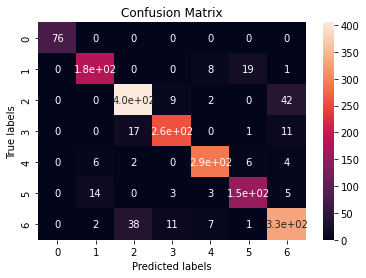

In [ ]:
ax = plt.subplot()
prednn = y_pred
cmsv = confusion_matrix(testlabel, prednn) #create a confusion matrix using the test labels and predicted labels
sns.heatmap(cmsv, annot = True, ax = ax); #heatmap to make reading the confusion matrix either
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

Support Vector machine Confusion Matrix

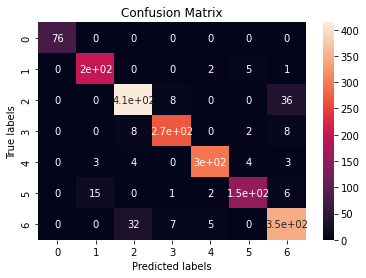

In [ ]:
ax = plt.subplot()
predsvc = pred_svc
cmsv = confusion_matrix(testlabel, predsvc)
sns.heatmap(cmsv, annot = True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

Neural Network Confusion Matrix

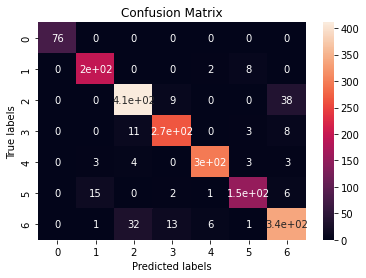

In [ ]:
ax = plt.subplot()
cmsv = confusion_matrix(testlabel, predict_results)
sns.heatmap(cmsv, annot = True, ax = ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


###Explanation

These are numerical values for each Dry bean type:

Bombay = 0, Cali = 1, Dermason = 2, Seker = 3, Horoz = 4, 
Barbunya = 5, Sira = 6

Here we get to see where each algorithim made the most mistakes and which mistakes were the most common.

Since the Bombay beans were the most different from the other bean types each algorithim was able to classify each type correctly. Cali beans were mostly classified correctly by the neural network and the support vector machine (withe support vector machine making the least mistakes) but nearest neighbor misclassified Cali as Barbunya 23 times. Dermason beans were the most misclassified by all algorithims with 30-47 being misclassified as Sira beans. The support vector machines had the least mistakes in this. 

Seker beans were generally well classified, but were misclassified as Sira beans 11 times by both the neural networks and the support vector machine. Nearest neighbors did not misclassify Seker as Sira but misclassified them more often as Dermason. Horoz beans were mostly well classified by all algorithims, with nearest neighbors having the least accuracy. Barbunya beans were misclassified heavily as Cali beans (21-24). Sira beans were also heavily misclassified as Dermason beans (32-39) with the neural network being the most accurate.

This leads me to believe that the algorithims would specialize in differentiating only certain types of beans from other certain types of beans. Of course, the correct answers are much more numerous but if we want close to 100% accuracy than that is what I would suggest


##Comparison of 3d graphs

###Conversion of nearest neighbor and support vector machine back into a dataframe

This is needed for visualization later

In [ ]:
nnbeandata = ntestdata.copy() # copy of the pandas dataframe
nnlist = [] #list for addition of the true labels.
for i in y_pred: #iterate through predicted y values of nearest neighbors and append the labels into a list
#to be able to add into the pandas dataframe
  if i == 0:          
    nnlist.append("BOMBAY")
  if i == 1:
    nnlist.append("CALI")
  if i == 2:
    nnlist.append("DERMASON")
  if i == 3:
    nnlist.append("SEKER")
  if i == 4:
    nnlist.append("HOROZ")
  if i == 5:
    nnlist.append("BARBUNYA")
  if i == 6:
    nnlist.append("SIRA")

nnbeandata["Class"] = nnlist #list is added to pandas dataframe as feature 'class'

In [ ]:
svcbeandata = ntestdata.copy() # do it for support vector machine results
svclist = []
for i in pred_svc: 
  if i == 0:          
    svclist.append("BOMBAY")
  if i == 1:
    svclist.append("CALI")
  if i == 2:
    svclist.append("DERMASON")
  if i == 3:
    svclist.append("SEKER")
  if i == 4:
    svclist.append("HOROZ")
  if i == 5:
    svclist.append("BARBUNYA")
  if i == 6:
    svclist.append("SIRA")

svcbeandata["Class"] = svclist

In [ ]:
neuralnetbeandata = ntestdata.copy() # do it for neural net results
neuralnetlist = []
for i in predict_results: 
  if i == 0:          
    neuralnetlist.append("BOMBAY")
  if i == 1:
    neuralnetlist.append("CALI")
  if i == 2:
    neuralnetlist.append("DERMASON")
  if i == 3:
    neuralnetlist.append("SEKER")
  if i == 4:
    neuralnetlist.append("HOROZ")
  if i == 5:
    neuralnetlist.append("BARBUNYA")
  if i == 6:
    neuralnetlist.append("SIRA")
neuralnetbeandata["Class"] = neuralnetlist

In [ ]:
ngtraindata = ntraindata.copy() #do it for training data
ngtrainlist = []
for i in trainlabel: 
  if i == 0:          
    ngtrainlist.append("BOMBAY")
  if i == 1:
    ngtrainlist.append("CALI")
  if i == 2:
    ngtrainlist.append("DERMASON")
  if i == 3:
    ngtrainlist.append("SEKER")
  if i == 4:
    ngtrainlist.append("HOROZ")
  if i == 5:
    ngtrainlist.append("BARBUNYA")
  if i == 6:
    ngtrainlist.append("SIRA")


ngtraindata["Class"] = ngtrainlist

nnbeandata = nearest neighbor pandas dataframe with predicted labels


svcbeandata = support vector machine pandas dataframe with predicted labels


neuralnetbeandata = neural net pandas dataframe with predicted label

###3d graphs

Training data 3d graph

In [ ]:
fig = px.scatter_3d(ngtraindata, x =  "roundness", y = "MajorAxisLength", z = "MinorAxisLength"
  , color = "Class")
fig.update_traces(marker_size = 1)
fig.show(figsize = (8,8)) #3d plotly plot to show how each compares to each other

Nearest Neighbor 3d graph

In [ ]:
fig = px.scatter_3d(nnbeandata, x =  "roundness", y = "MajorAxisLength", z = "MinorAxisLength"
  , color = "Class")
fig.update_traces(marker_size = 2)
fig.show(figsize = (8,8)) #results of nearest neighbors in plotly graph

Support vector machine 3d graph

In [ ]:
fig = px.scatter_3d(svcbeandata, x =  "roundness", y = "MajorAxisLength", z = "MinorAxisLength"
  , color = "Class")
fig.update_traces(marker_size = 2)
fig.show(figsize = (8,8)) #results of svc beandata in plotly form

Neural net 3d graph

In [ ]:
fig = px.scatter_3d(neuralnetbeandata, x =  "roundness", y = "MajorAxisLength", z = "MinorAxisLength"
  , color = "Class")
fig.update_traces(marker_size = 2)
fig.show(figsize = (8,8)) #results of neural net data in plotly graph (if wildly different colors please run again)

###Explanation

The 3d graphs of the normalized data are all extremely similar, and hard if not impossible to tell apart. This is because all of the accuracies are almost the same. 87-88% for nearest neighbors, around 92% for support vector machines, and around 91% for the neural network. That is a 4 % difference that is very hard to visualize over 3d graphs of this scale

#Extra: Unormalized data

large = unnormalized training data

testdata = unnormalized testing data

validdata = unnormalized validation data (for machine learning algorithim) 

In [ ]:
X_untrain = np.array(large)
y_untrain = np.array(trainlabel)
X_untest = np.array(testdata)
y_untest = np.array(testlabel) #convert pandas into numpy array so nearest and SVC can run it.

##Nearest neighbors with unnormalized data

In [ ]:
nn = nearest_neighbor()
nn.fit(X_untrain, y_untrain)
y_unpred = np.array([nn.predict(X_untest[i]) for i in range(len(X_untest))]) #This part of the code takes a long time to run. Average of 2min 31s
accnn = np.sum(y_unpred == y_untest)/ len(y_untest)
accnn

0.8756558237145855

##Support vector machines with unnormalized data

In [ ]:
svc.fit(X_untrain, y_untrain) #default parameters
predd_svc = svc.predict(X_untest)
accsvc = np.sum(predd_svc == y_untest)/len(y_untest)
accsvc


0.9160545645330536

##Neural net with unnormalized data

In [ ]:
with tf.device('/CPU:0'): history = model.fit(large, trainindex, batch_size = batch_size, epochs=epoch, verbose=1, shuffle=True, steps_per_epoch = int(large.shape[0] / batch_size) , validation_data = (validdata, validindex),)

Epoch 1/100
680/680 [==============================] - 1s 2ms/step - loss: 4142.1812 - accuracy: 0.1373 - val_loss: 2972.8125 - val_accuracy: 0.1726
Epoch 2/100
680/680 [==============================] - 1s 1ms/step - loss: 2499.7354 - accuracy: 0.2440 - val_loss: 2085.0090 - val_accuracy: 0.2350
Epoch 3/100
680/680 [==============================] - 1s 1ms/step - loss: 1775.2101 - accuracy: 0.2476 - val_loss: 1466.7360 - val_accuracy: 0.2362
Epoch 4/100
680/680 [==============================] - 1s 1ms/step - loss: 1232.5001 - accuracy: 0.2792 - val_loss: 1047.7845 - val_accuracy: 0.2644
Epoch 5/100
680/680 [==============================] - 1s 1ms/step - loss: 885.6707 - accuracy: 0.3040 - val_loss: 732.0244 - val_accuracy: 0.2754
Epoch 6/100
680/680 [==============================] - 1s 1ms/step - loss: 580.6995 - accuracy: 0.3138 - val_loss: 429.6277 - val_accuracy: 0.2840
Epoch 7/100
680/680 [==============================] - 1s 1ms/step - loss: 295.7191 - accuracy: 0.3882 - val_l

In [ ]:
upredict_results = model.predict(testdata).argmax(axis = 1)
accneural = np.sum(upredict_results == y_untest)/ len(y_untest)
accneural

0.7324239244491081

##Graphs

###pre-graph information

In [ ]:
unnbeandata = ntestdata.copy() # copy of the pandas dataframe
unnlist = [] #list for addition of the true labels.
for i in y_unpred: #iterate through predicted y values of nearest neighbors and append the labels into a list
#to be able to add into the pandas dataframe
  if i == 0:          
    unnlist.append("BOMBAY")
  if i == 1:
    unnlist.append("CALI")
  if i == 2:
    unnlist.append("DERMASON")
  if i == 3:
    unnlist.append("SEKER")
  if i == 4:
    unnlist.append("HOROZ")
  if i == 5:
    unnlist.append("BARBUNYA")
  if i == 6:
    unnlist.append("SIRA")

unnbeandata["Class"] = unnlist #list is added to pandas dataframe as feature 'class'

In [ ]:
usvcbeandata = ntestdata.copy() # copy of the pandas dataframe
svcclist = [] #list for addition of the true labels.
for i in predd_svc: 
  if i == 0:          
    svcclist.append("BOMBAY")
  if i == 1:
    svcclist.append("CALI")
  if i == 2:
    svcclist.append("DERMASON")
  if i == 3:
    svcclist.append("SEKER")
  if i == 4:
    svcclist.append("HOROZ")
  if i == 5:
    svcclist.append("BARBUNYA")
  if i == 6:
    svcclist.append("SIRA")

usvcbeandata["Class"] = svclist #list is added to pandas dataframe as feature 'class'

In [ ]:
uneuralbeandata = ntestdata.copy() # copy of the pandas dataframe
nulist = [] #list for addition of the true labels.
for i in upredict_results:
  if i == 0:          
    nulist.append("BOMBAY")
  if i == 1:
    nulist.append("CALI")
  if i == 2:
    nulist.append("DERMASON")
  if i == 3:
    nulist.append("SEKER")
  if i == 4:
    nulist.append("HOROZ")
  if i == 5:
    nulist.append("BARBUNYA")
  if i == 6:
    nulist.append("SIRA")

uneuralbeandata["Class"] = nulist #list is added to pandas dataframe as feature 'class'

###Graphs

In [ ]:
fig = px.scatter_3d(usvcbeandata, x =  "roundness", y = "MajorAxisLength", z = "MinorAxisLength"
  , color = "Class")
fig.update_traces(marker_size = 2)
fig.show(figsize = (8,8)) #3d plotly plot to show how each compares to each other

In [ ]:
fig = px.scatter_3d(uneuralbeandata, x =  "roundness", y = "MajorAxisLength", z = "MinorAxisLength"
  , color = "Class")
fig.update_traces(marker_size = 2)
fig.show(figsize = (8,8)) #3d plotly plot to show how each compares to each other

There is a big difference between the neural data and the svc (nearest not shown because it is too near to svc). The graph helps visualize it

##Summary

unnormalized data resulted in lower accuracies across the board. Specifically for the neural net which had a low of 70%. SVC and nearest neighbors were not very affected, nearest neighbors perhaps because of the distance function which normalizes the x-data in certain parts. 